# Setup

## Modules

In [28]:
# basic and statistics
import numpy as np
import pandas as pd
import HTfunctions as ht
from scipy import stats

# plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Mean proportion of annual streamflow

Results/dailyMeans/doyMean_streamflow_ost_10dMA_1983_2012.npy
Results/dailyMeans/doyMean_streamflow_vest_10dMA_1983_2012.npy


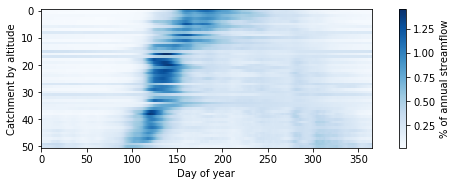

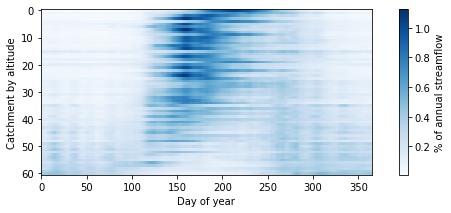

In [29]:
for region in ["ost","vest"]:
    file = ht.findFiles(f"*stream*{region}*.npy","Results/dailyMeans")[0]
    print(file)
    name = file.split("/")[-1].split(".")[0]
    
    mean = np.load(file).T
    prop = (mean/mean.sum(axis=1)[:,None])*100
    
    N = prop.shape[0]
    plt.figure(figsize=(10,N/20))
    plt.imshow(prop,cmap="Blues",aspect=3)
    plt.colorbar(label="% of annual streamflow")
    plt.xlabel("Day of year")
    plt.ylabel("Catchment by altitude")
    
    plt.savefig(f"Plots/1983_2012/{name}.png",dpi=300,bbox_inches="tight")

# Mean streamflow

## Østlandet

Results/dailyMeans/doyMean_streamflow_ost_10dMA_1983_2012.npy


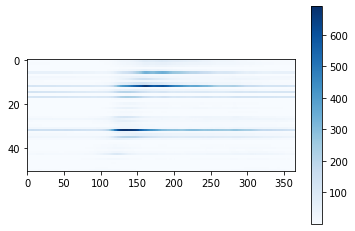

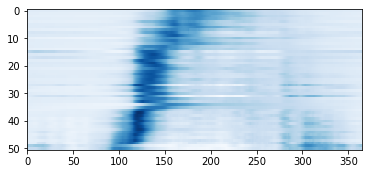

In [30]:
file = ht.findFiles("*stream*ost*.npy","Results/dailyMeans")[0]
print(file)
mean = np.load(file).T

plt.imshow(mean,cmap="Blues",aspect=3)
plt.colorbar()

annMean = mean.mean(axis=1)
annSd = mean.std(axis=1)
norm = ((mean-annMean[:,None]).T/annSd).T
plt.figure()
plt.imshow(norm,cmap="Blues",aspect=3)

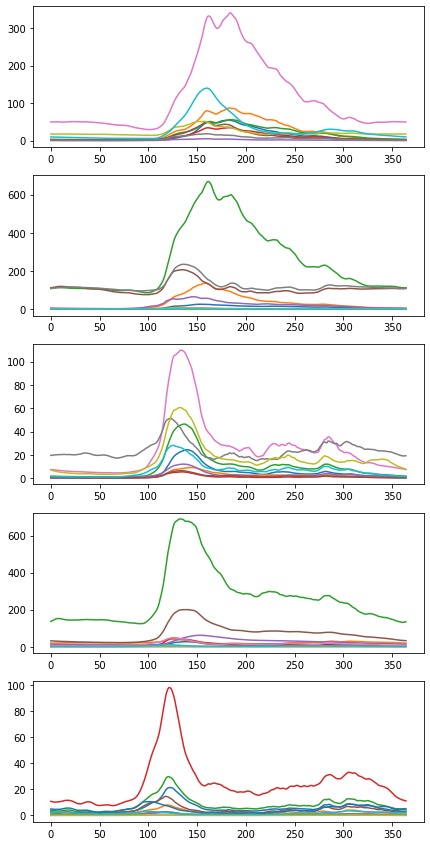

In [31]:
N = mean.shape[0]
#N = 30
fig,ax = plt.subplots(nrows=5,figsize=(7,15))
for c in range(N):
    if c < 10:
        ax[0].plot(mean[c,:])
    elif c<20:
        ax[1].plot(mean[c,:])
    elif c<30:
        ax[2].plot(mean[c,:])
    elif c<40:
        ax[3].plot(mean[c,:])
    else:
        ax[4].plot(mean[c,:])

## Vestlandet

Results/dailyMeans/doyMean_streamflow_vest_10dMA_1983_2012.npy


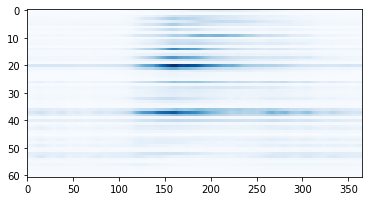

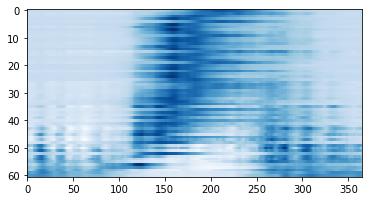

In [32]:
file = ht.findFiles("*stream*vest*.npy","Results/dailyMeans")[0]
print(file)
mean = np.load(file).T

plt.imshow(mean,cmap="Blues",aspect=3)

annMean = mean.mean(axis=1)
annSd = mean.std(axis=1)
norm = ((mean-annMean[:,None]).T/annSd).T
plt.figure()
plt.imshow(norm,cmap="Blues",aspect=3)

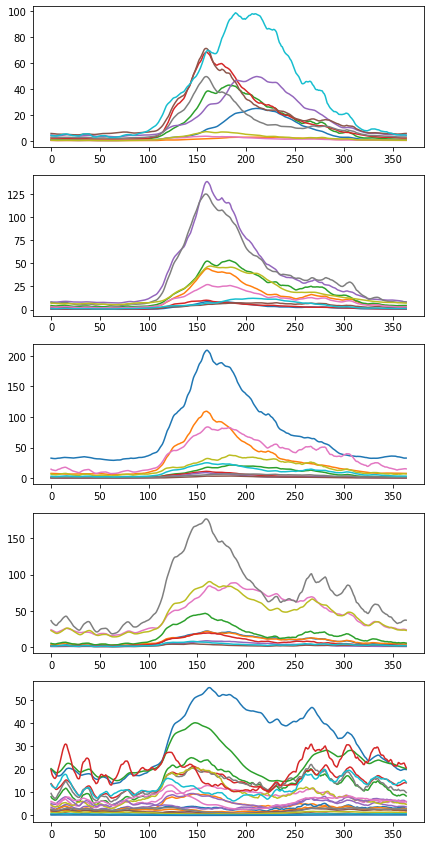

In [33]:
N = mean.shape[0]
#N = 30
fig,ax = plt.subplots(nrows=5,figsize=(7,15))
for c in range(N):
    if c < 10:
        ax[0].plot(mean[c,:])
    elif c<20:
        ax[1].plot(mean[c,:])
    elif c<30:
        ax[2].plot(mean[c,:])
    elif c<40:
        ax[3].plot(mean[c,:])
    else:
        ax[4].plot(mean[c,:])

# Proportional streamflow trend

Results/Daily/trendMagnitudes_streamflow_ost_10dMA_1983_2012.npy


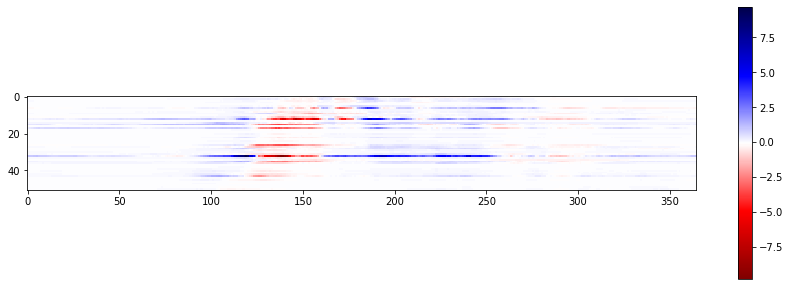

In [38]:
file = ht.findFiles("*Mag*_stream*ost*1983*.npy","Results/Daily")[0]
print(file)
trend = np.load(file)
plt.figure(figsize=(15,5))
plt.imshow(trend,cmap="seismic_r")
plt.colorbar()

streamflow_ost_10dMA_1983_2012
Results/dailyMeans/doyMean_streamflow_ost_10dMA_1983_2012.npy


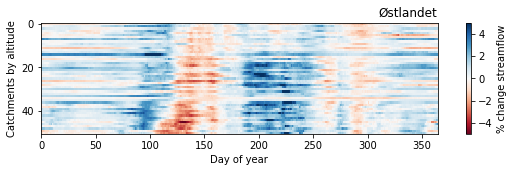

In [39]:
file = ht.findFiles("*Mag*_stream*ost*1983*.npy","Results/Daily")[0]
trend = np.load(file)
name = "_".join(file.split(".")[0].split("_")[1:])
print(name)

file = ht.findFiles("*_stream*ost*.npy","Results/dailyMeans")[0]
print(file)
mean = np.load(file).T

trendPro = (trend/mean)*100
np.save(f"Results/Daily/trendMagnitudes_PRO{name}.npy",trendPro)

# plotting
N = trendPro.shape[0]
plt.figure(figsize=(10,N/25))
plt.imshow(trendPro,cmap="RdBu",vmax=5,vmin=-5,aspect=2)
# labels
plt.title("Østlandet",loc="right")
plt.ylabel("Catchments by altitude")
plt.xlabel("Day of year")
# colorbar
plt.colorbar(label="% change streamflow")
#saving
plt.savefig(f"Plots/1983_2012/dailyTrend_Qpro_{name}.png",dpi=400,bbox_inches="tight")

streamflow_vest_10dMA_1983_2012
Results/dailyMeans/doyMean_streamflow_vest_10dMA_1983_2012.npy


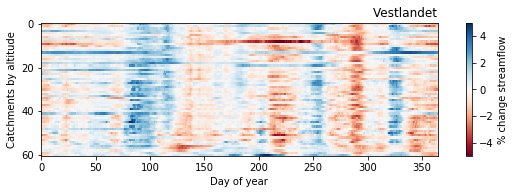

In [40]:
file = ht.findFiles("*Mag*_stream*vest*1983*.npy","Results/Daily")[0]
trend = np.load(file)
name = "_".join(file.split(".")[0].split("_")[1:])
print(name)

file = ht.findFiles("*_stream*vest*.npy","Results/dailyMeans")[0]
print(file)
mean = np.load(file).T

trendPro = (trend/mean)*100
np.save(f"Results/Daily/trendMagnitudes_PRO{name}.npy",trendPro)

# plotting
N = trendPro.shape[0]
plt.figure(figsize=(10,N/25))
plt.imshow(trendPro,cmap="RdBu",vmax=5,vmin=-5,aspect=2)
# labels
plt.title("Vestlandet",loc="right")
plt.ylabel("Catchments by altitude")
plt.xlabel("Day of year")
# colorbar
plt.colorbar(label="% change streamflow")
#saving
plt.savefig(f"Plots/1983_2012/dailyTrend_Qpro_{name}.png",dpi=400,bbox_inches="tight")

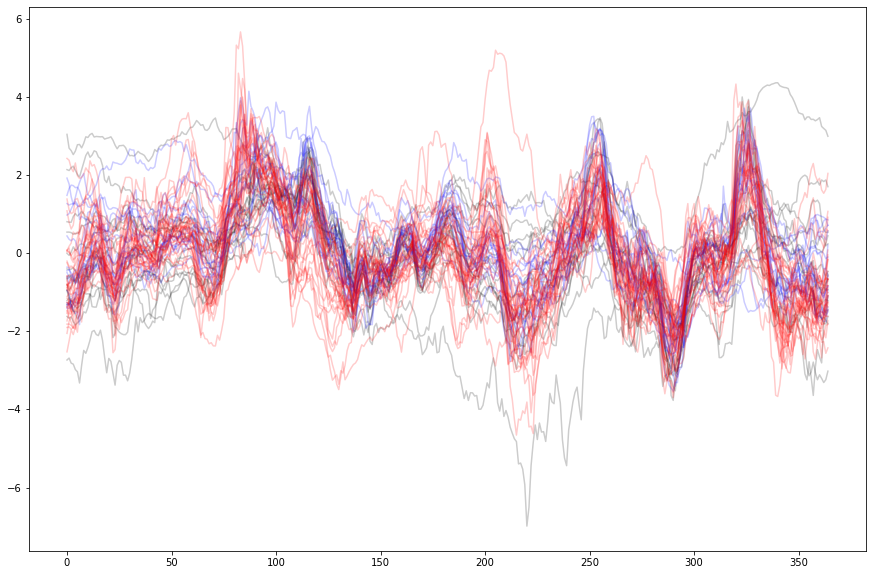

In [41]:
N = trendPro.shape[0]
#N = 30
plt.figure(figsize=(15,10))
for c in range(N):
    if c < 15:
        plt.plot(trendPro[c,:],"k",alpha=0.2)
    elif c<30:
        plt.plot(trendPro[c,:],"b",alpha=0.2)
    else:
        plt.plot(trendPro[c,:],"r",alpha=0.2)